<a href="https://colab.research.google.com/github/Ulrike13/Mirea_KNN/blob/main/TeaCoffee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,Кофе или чай?,Пол_Ж,Пол_М,Занимаетесь спортом?_Да,Занимаетесь спортом?_Нет,Есть ли работа?_Да,Есть ли работа?_Нет,Есть ли сердечные заболевания?_Да,Есть ли сердечные заболевания?_Нет,Сова или Жаворонок_Жаворонок,...,Административный округ_Северо-Восточный административный округ,Административный округ_Северо-западный административный округ,Административный округ_Центральный административный округ,Административный округ_Юго-Восточный административный округ,Административный округ_Юго-Западный административный округ,Административный округ_Южный административный округ,Время сна_7-8 часов,Время сна_Более 8 часов,Время сна_Менее 3 часов,Время сна_От 3 до 6 часов
0,Чай,0,1,0,1,1,0,0,1,1,...,0,0,0,1,0,0,1,0,0,0
1,Кофе,0,1,1,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,Чай,0,1,1,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,Чай,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,1,1,0,0,0
4,Чай,1,0,0,1,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
5,Чай,0,1,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
6,Кофе,0,1,1,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
7,Кофе,1,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
8,Чай,0,1,0,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
9,Чай,0,1,0,1,0,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0


Accuracy: 0.7619047619047619
Classification Report:
              precision    recall  f1-score   support

        Кофе       0.50      0.40      0.44         5
         Чай       0.82      0.88      0.85        16

    accuracy                           0.76        21
   macro avg       0.66      0.64      0.65        21
weighted avg       0.75      0.76      0.75        21



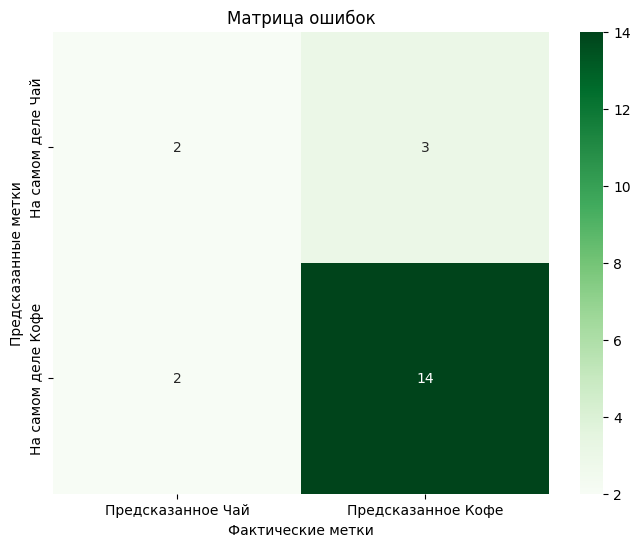

In [82]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/cofe_teaEdited.csv')
df.drop('Отметка времени', axis=1, inplace=True) # Избавляемся от "отметок времени"

#     One-hot encoding к категориальным столбцам
categorical_columns = ['Пол', 'Занимаетесь спортом?', 'Есть ли работа?', 'Есть ли сердечные заболевания?', 'Сова или Жаворонок', 'Есть ли молоко в холодильнике?', 'Время подъема', 'Административный округ', 'Время сна']
df = pd.get_dummies(df, columns=categorical_columns)
display(df)

#     Подготовка данных
X = df.drop("Кофе или чай?", axis=1)  # Признаки
y = df["Кофе или чай?"]  # Целевая переменная

#     Нормализация числовых признаков
scaler = StandardScaler()
X = scaler.fit_transform(X)

#     Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

#     Обучение модели k nearest neighbors
k = 3  # Количество соседей
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

#     Оценка точности модели
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

#     Визуализация матрицы ошибок
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=["Предсказанное Чай", "Предсказанное Кофе"], yticklabels=["На самом деле Чай", "На самом деле Кофе"])
plt.xlabel('Фактические метки')
plt.ylabel('Предсказанные метки')
plt.title('Матрица ошибок')
plt.show()


# Новый раздел